# 前期准备

In [1]:
# !apt install fonts-noto fonts-noto-cjk* fonts-droid-fallback

In [2]:
import pandas as pd
print('pandas:', pd.__version__)
import numpy as np
print('numpy:', np.__version__)
import matplotlib
print('matplotlib:', matplotlib.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('seaborn:', sns.__version__)

pandas: 1.4.1
numpy: 1.21.2
matplotlib: 3.5.1
seaborn: 0.11.2


In [3]:
# 列出能用的字体
import subprocess

mat_fonts = set(f.name for f in matplotlib.font_manager.FontManager().ttflist)

output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True)
output = output.decode('utf-8')
# print '*' * 10, '系统可用的中文字体', '*' * 10
# print output
zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
available = mat_fonts & zh_fonts

print('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print(f)

********** 可用的字体 **********


In [4]:
# 将中文字体放在备选字体首位

# ********** 可用的字体 **********
# AR PL UMing CN
# Noto Sans CJK JP
# AR PL UKai CN
# Noto Serif CJK JP
# Droid Sans Fallback

fonts = matplotlib.rcParamsDefault['font.sans-serif'].copy()
fonts.insert(0, 'Droid Sans Fallback')
fonts.insert(0, 'Noto Sans CJK JP')
matplotlib.rcParams['font.sans-serif'] = fonts
print('<font.sans-serif>: ', matplotlib.rcParams['font.sans-serif'])

fonts = matplotlib.rcParamsDefault['font.serif'].copy()
fonts.insert(0, 'Droid Sans Fallback')
fonts.insert(0, 'Noto Serif CJK JP')
matplotlib.rcParams['font.serif'] = fonts
print('<font.serif>: ', matplotlib.rcParams['font.serif'])

fonts = matplotlib.rcParamsDefault['font.monospace'].copy()
fonts.insert(0, 'Droid Sans Fallback')
matplotlib.rcParams['font.monospace'] = fonts
print('<font.monospace>: ', matplotlib.rcParams['font.monospace'])

<font.sans-serif>:  ['Noto Sans CJK JP', 'Droid Sans Fallback', 'DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
<font.serif>:  ['Noto Serif CJK JP', 'Droid Sans Fallback', 'DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
<font.monospace>:  ['Droid Sans Fallback', 'DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


In [5]:
# matplotlib.rc('font', family='Noto Serif CJK JP')
matplotlib.rc('font', family='Noto Sans CJK JP')
# matplotlib.rc('font', family='Droid Sans Fallback')

# 数据导入

In [6]:
from datetime import datetime, timedelta
one_day = timedelta(days=1)

In [7]:
df = pd.read_csv('../data/shanghai-daily.csv', parse_dates=['日期'], infer_datetime_format=True)

# 限定日期范围
begin_date = '2022-03-10'
df = df[df['日期'] >= begin_date]
df = df.sort_values(['日期'])

df.head()

,日期,确诊病例,无症状感染者,轻型,普通型,重型,危重型,死亡,治愈出院,解除医学观察,...,长宁区_无症状_来自风险人群,青浦区_无症状_来自风险人群,静安区_无症状_来自风险人群,宝山区_无症状_来自风险人群,杨浦区_无症状_来自风险人群,普陀区_无症状_来自风险人群,崇明区_无症状_来自风险人群,金山区_无症状_来自风险人群,奉贤区_无症状_来自风险人群,来源
41,2022-03-10,43,74,0,0,0,0,0,17,7,...,0,0,1,0,0,0,0,0,0,http://wsjkw.sh.gov.cn/xwfb/20220311/a7bb01fac...
40,2022-03-11,27,87,0,0,0,0,0,20,3,...,0,0,1,1,0,0,0,4,1,http://wsjkw.sh.gov.cn/xwfb/20220312/559cc1eb3...
39,2022-03-12,14,65,0,0,0,0,0,26,11,...,1,0,0,0,0,0,0,0,0,http://wsjkw.sh.gov.cn/xwfb/20220313/ac598c010...
38,2022-03-13,57,130,0,0,0,0,0,33,5,...,0,1,1,0,2,3,0,1,0,http://wsjkw.sh.gov.cn/xwfb/20220314/ea83d1b33...
37,2022-03-14,21,133,0,0,0,0,0,15,9,...,0,0,1,1,1,0,0,1,2,http://wsjkw.sh.gov.cn/xwfb/20220315/e2b0122c5...


In [8]:
# 补充当天数据
# df = df.append({
#     '日期': df.日期.max() + one_day,
#     '确诊病例': 2634,
#     '无症状感染者': 15861,
#     '从无症状感染者转归确诊的病例': 459,
#     '从闭环隔离中发现的本土病例': 1976,
#     '从风险人群中发现的本土病例': 2634 - 1976 - 459,
#     '从闭环隔离中发现的无症状感染者': 15619,
#     '从风险人群中发现的无症状感染者': 15861 - 15619,
#     '境外输入病例': 1,
#     '境外输入无症状感染者': 2
# }, ignore_index=True)
# df

# 绘图

## 总体疫情趋势

In [9]:

def draw_overall(title, date, confirmed, asymptomatic, overall=True, y_title=None, ax=None):
    ax.grid(True, which='major', axis='y', alpha=0.3)

    position_top = max(confirmed) + max(asymptomatic)

    if overall:
        # '上海全域静态管理'
        ax.text(
            datetime.fromisoformat('2022-03-31') - one_day/2,
            position_top,
            '上海全域静态管理',
            rotation=90,
            horizontalalignment='right',
            verticalalignment='top',
            multialignment='center',
            size=17,
            color='darkblue',
            alpha=0.6
            )

        ax.axvline(
            datetime.fromisoformat('2022-03-31') - one_day/2,
            0,position_top,
            linestyle='-', linewidth=3, color='red', alpha=0.3,
            )

        #     '指数上升趋势放缓'
        ax.text(
            datetime.fromisoformat('2022-04-07') - one_day/2,
            position_top,
            '指数上升趋势放缓',
            rotation=90,
            horizontalalignment='right',
            verticalalignment='top',
            multialignment='center',
            size=17,
            color='darkblue',
            alpha=0.6
            )

        ax.axvline(
            datetime.fromisoformat('2022-04-07') - one_day/2,
            0,position_top,
            linestyle='-', linewidth=3, color='red', alpha=0.3,
            )

        #     '平台期'
        ax.axvspan(
            datetime.fromisoformat('2022-04-10') - one_day/2,
            datetime.fromisoformat('2022-04-17') - one_day/2,
            color='pink', alpha=0.4,
            )

        ax.text(
            datetime.fromisoformat('2022-04-10') + one_day*4,
            position_top,
            '平台期',
            rotation=0,
            horizontalalignment='right',
            verticalalignment='top',
            multialignment='center',
            size=17,
            color='darkblue',
            alpha=0.6
            )


    # 画 bar 图
    b1 = ax.bar(x=date, height=confirmed, label='确诊病例',
        clip_on=True,
        width=1,
        color=matplotlib.cm.Reds(matplotlib.colors.LogNorm()(confirmed)),
        edgecolor='w',
        linewidth=2,
        alpha=1)
    ax.bar_label(b1, confirmed.astype('int32'), rotation=90, padding=8, color='w', fontsize=15, weight='bold')

    b2 = ax.bar(x=date, height=asymptomatic, label='无症状感染者',
        clip_on=True,
        width=1,
        color=matplotlib.cm.Wistia(matplotlib.colors.Normalize()(asymptomatic)),
        edgecolor='w',
        linewidth=2,
        alpha=1,
        bottom=confirmed)
    ax.bar_label(b2, asymptomatic.astype('int32'), rotation=90, padding=-45, color='w', fontsize=15, weight='bold')
    if overall:
        ax.legend(ncol = 2, loc = 'lower left', fontsize=15)

    # 标题
    if y_title is None:
        y_title = asymptomatic.max() + confirmed.max()

    t = date.max().strftime('%Y年%m月%d日') + "更新 ({})\n(新增 {:.0f} 确诊病例，新增 {:.0f} 无症状感染者)".format(title, confirmed.iloc[-1], asymptomatic.iloc[-1])
    ax.text(
        x=date.min() + one_day, y=y_title,
        s=t,
        rotation=0,
        horizontalalignment='left',
        verticalalignment='top',
        multialignment='center',
        size='xx-large',
        fontweight='bold',
        color='black',
        alpha=1
        )


    # X 轴日期格式调整
    if overall:
        ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))

    # ax.set_xticks(ax.get_xticks(), rotation=90, ha='center')
    if overall:
        plt.xticks(rotation=90, ha='center')
    ax.set_xlim([date.min(), date.max() + one_day])


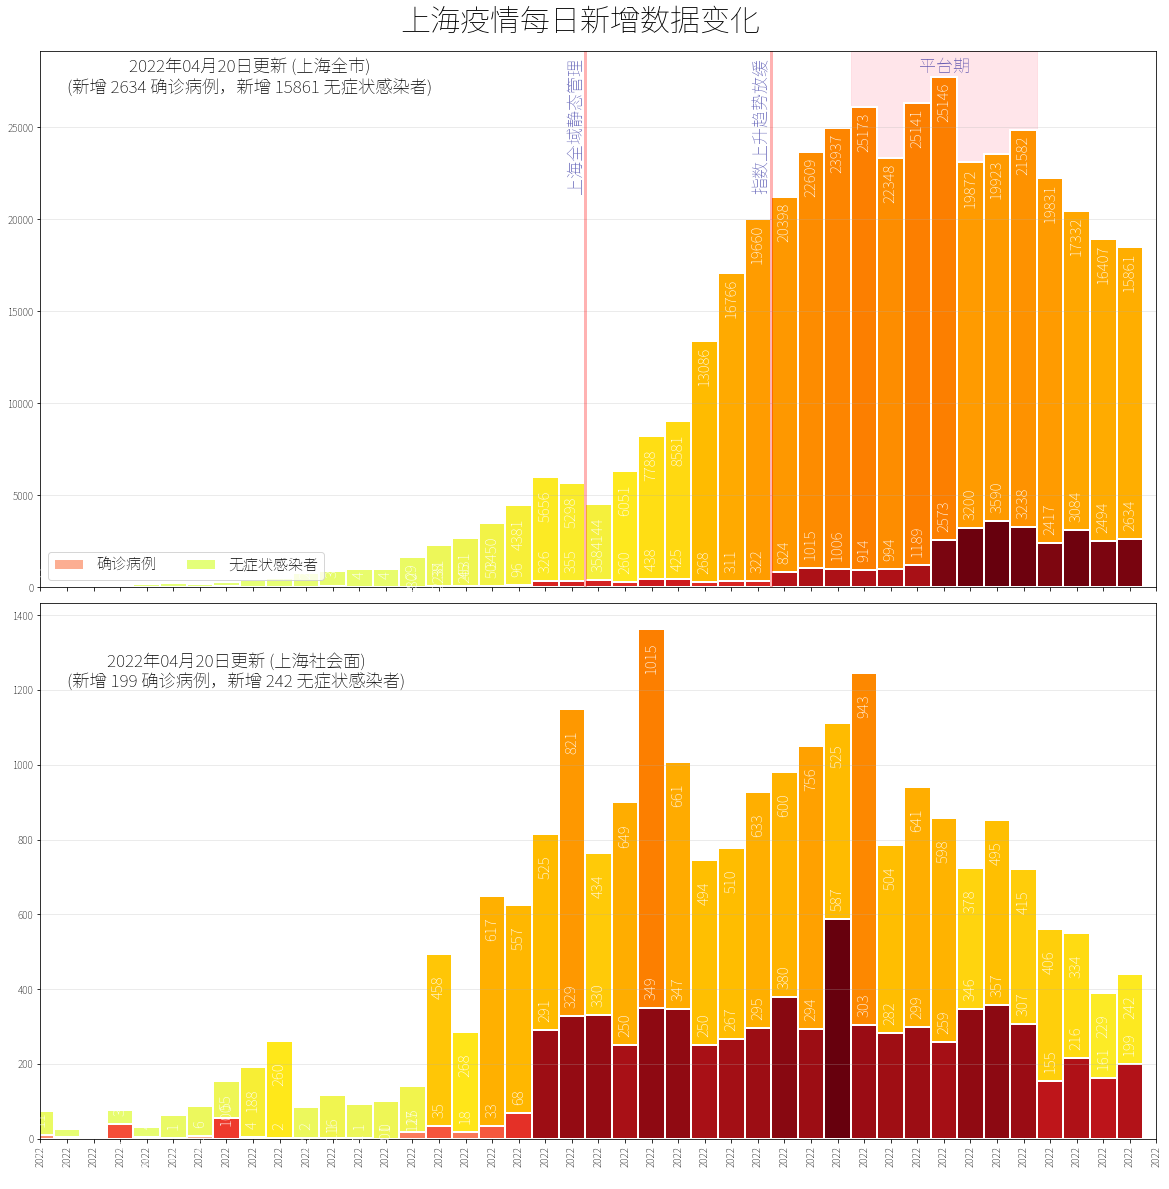

In [21]:
fig, axes = plt.subplots(2, 1, figsize = (20,20), sharex=True)

plt.suptitle('上海疫情每日新增数据变化', y=0.90, fontsize=30, fontweight='bold', va='center')

draw_overall('上海全市', df['日期'], df['本土确诊病例'], df['本土无症状感染者'], overall=True, ax=axes[0])
draw_overall('上海社会面', df['日期'], df['从风险人群中发现的本土病例'], df['从风险人群中发现的无症状感染者'], overall=False, y_title=1300, ax=axes[1])

plt.subplots_adjust(wspace=0.02, hspace=0.03)
plt.show()

## 分区确诊和无症状

In [11]:
districts =[
    "浦东新区",
    "徐汇区",
    "闵行区",
    "黄浦区",
    "嘉定区",
    "松江区",
    "虹口区",
    "长宁区",
    "青浦区",
    "静安区",
    "宝山区",
    "杨浦区",
    "普陀区",
    "崇明区",
    "金山区",
    "奉贤区",
]

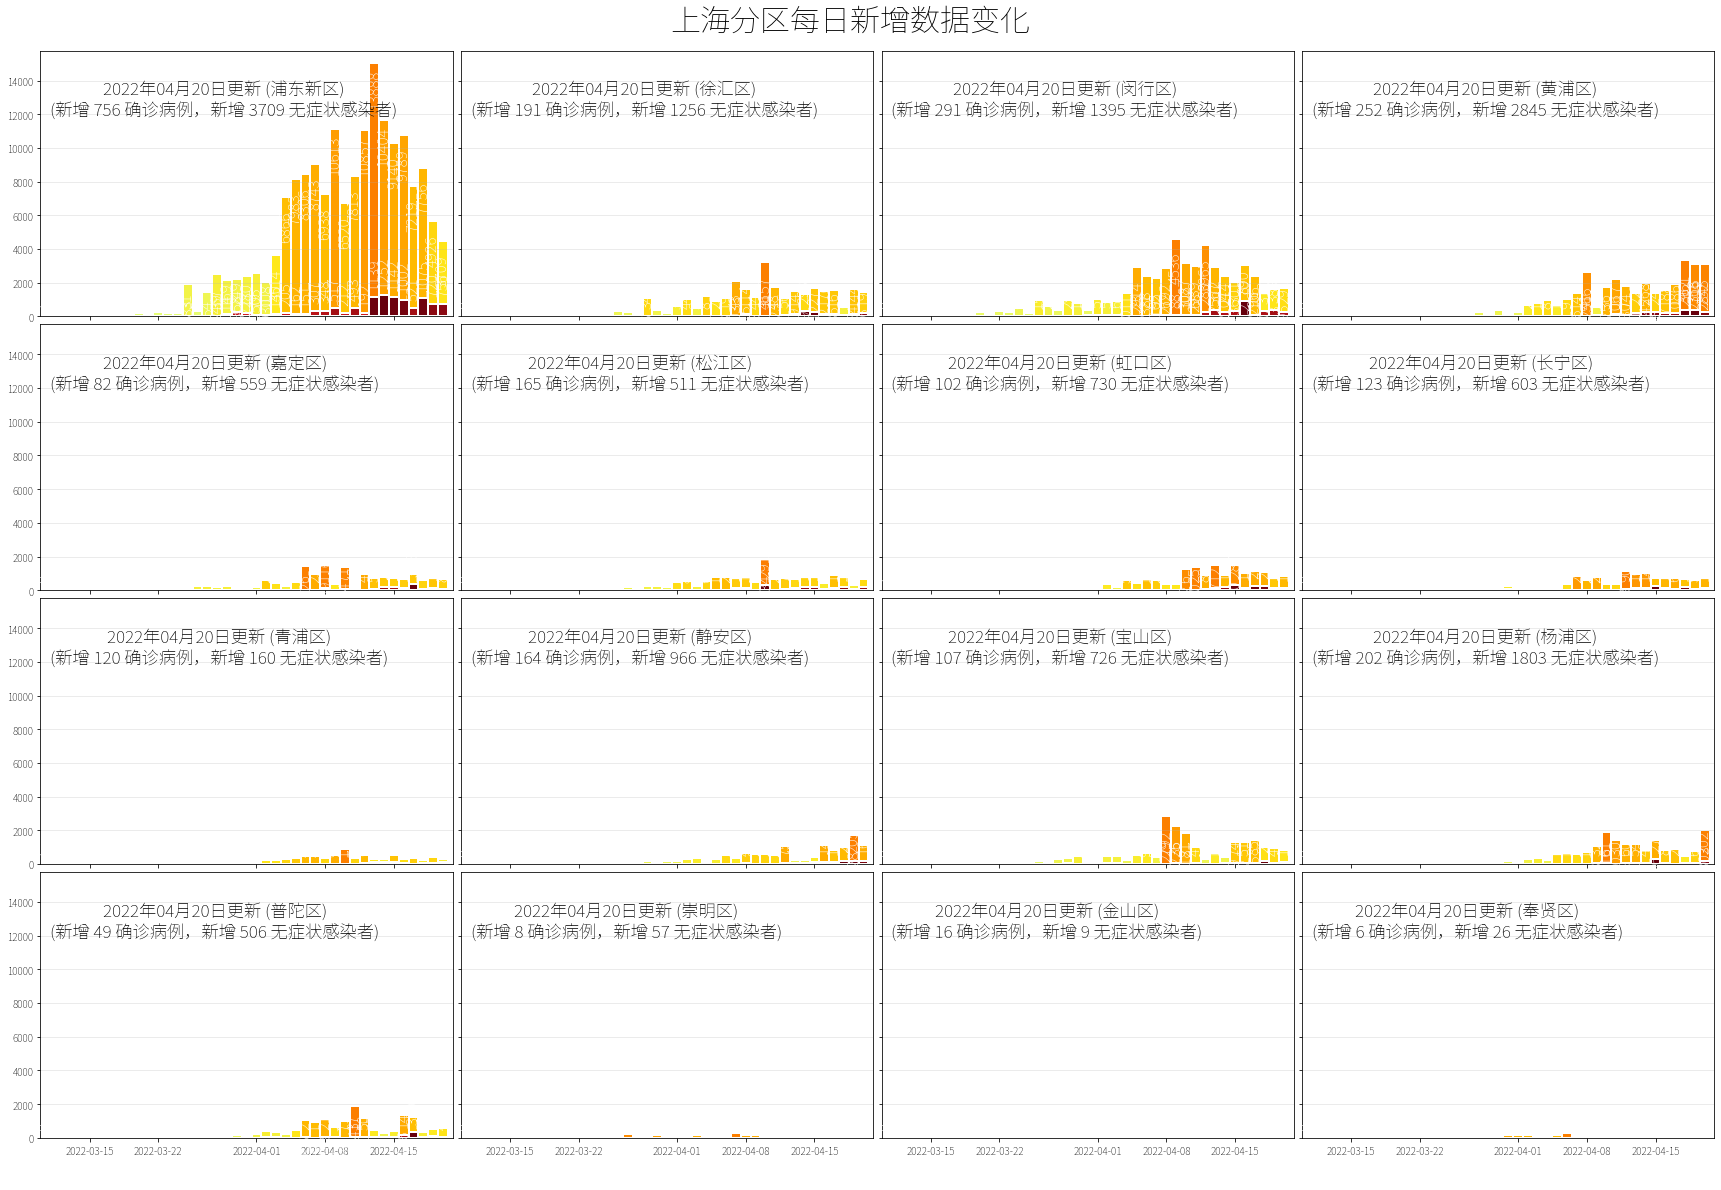

In [22]:
fig, axes = plt.subplots(4, 4, figsize = (30,20), sharex=True, sharey=True)
df_regions = df.iloc[:]
plt.suptitle('上海分区每日新增数据变化', y=0.90, fontsize=30, fontweight='bold', va='center')
for i, d in enumerate(districts):
    draw_overall(d, df_regions['日期'], df_regions['{}_确诊'.format(d)], df_regions['{}_无症状'.format(d)], overall=False, y_title=14000, ax=axes[int(i/4), i%4])

plt.subplots_adjust(wspace=0.02, hspace=0.03)
plt.show()

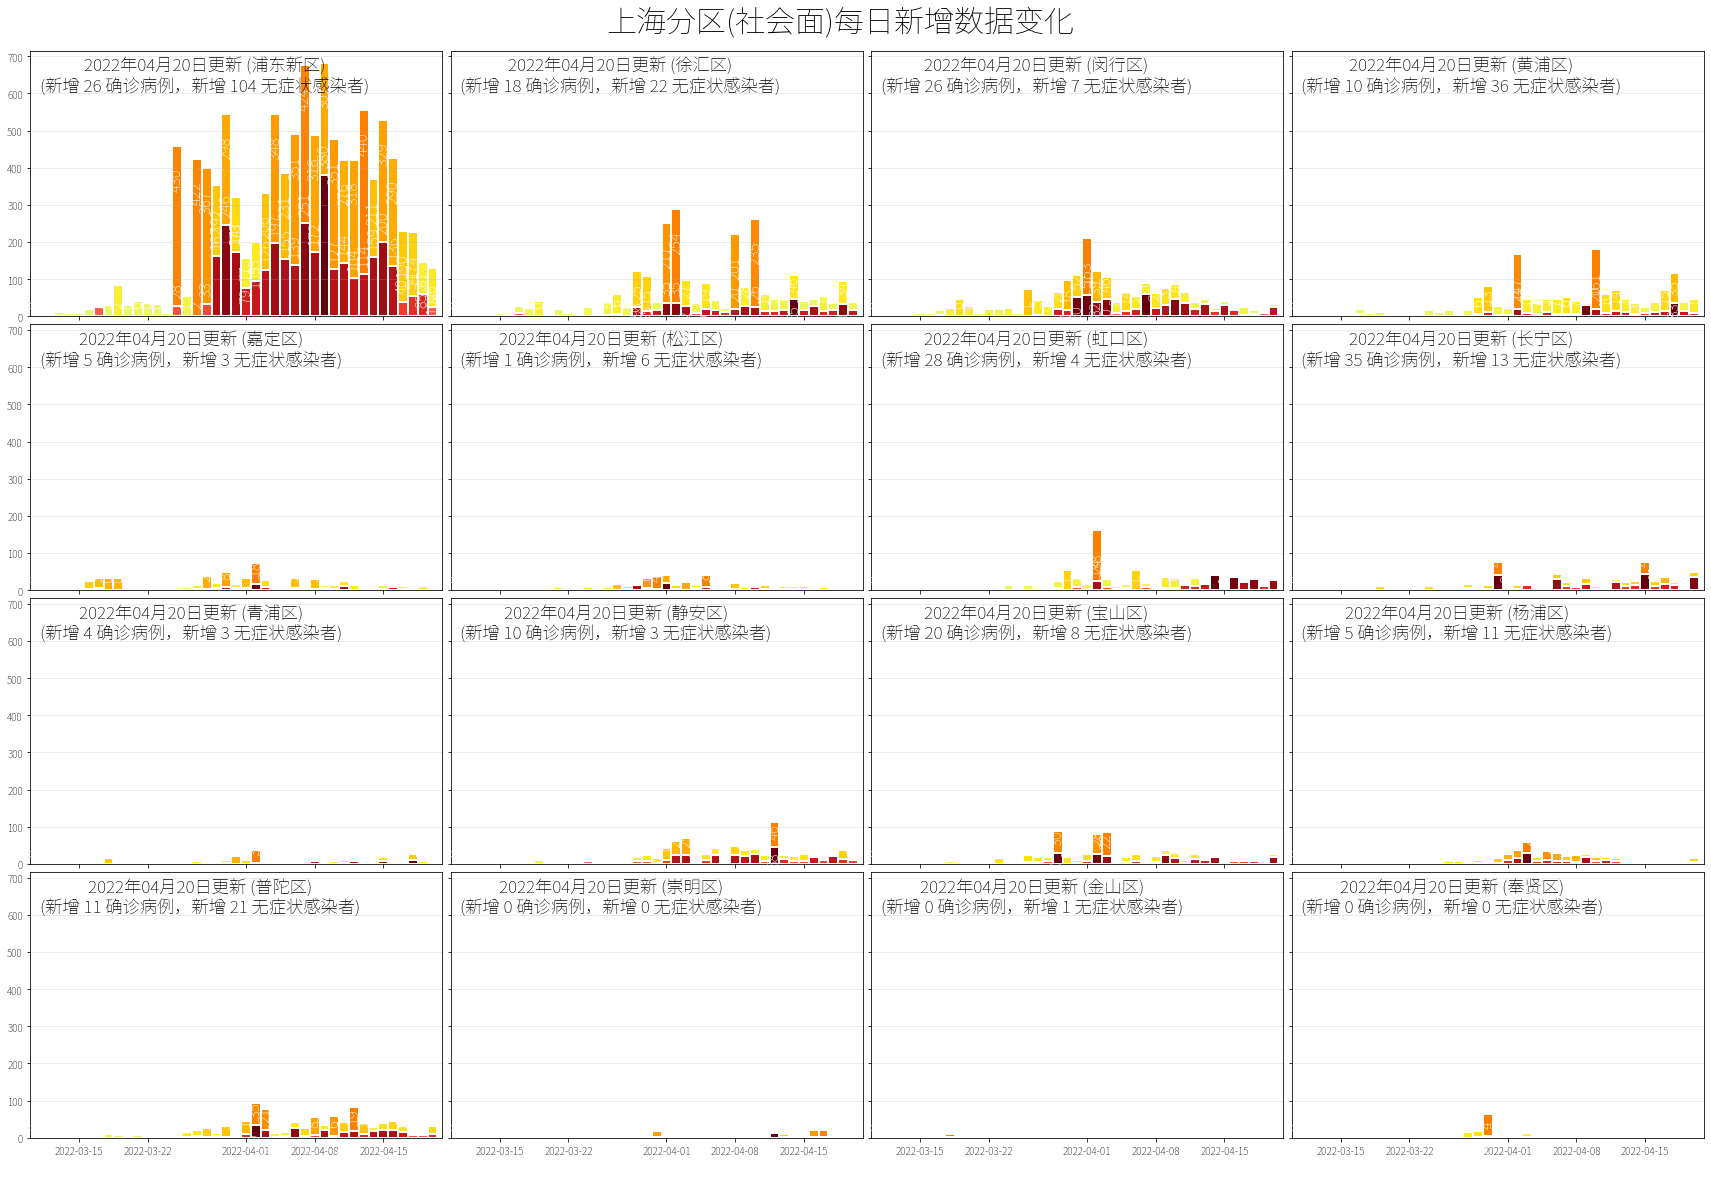

In [23]:
fig, axes = plt.subplots(4, 4, figsize = (30,20), sharex=True, sharey=True)
df_regions = df.iloc[:]
plt.suptitle('上海分区(社会面)每日新增数据变化', y=0.90, fontsize=30, fontweight='bold', va='center')
for i, d in enumerate(districts):
    draw_overall(d, df_regions['日期'], df_regions['{}_确诊_来自风险人群'.format(d)], df_regions['{}_无症状_来自风险人群'.format(d)], overall=False, y_title=700, ax=axes[int(i/4), i%4])

plt.subplots_adjust(wspace=0.02, hspace=0.03)
plt.show()